In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:

import random

# The data to load
f = "results.csv"

# Count the lines
num_lines = sum(1 for l in open(f))

# Sample size - in this case ~10%
size = int(num_lines / 10)

# The row indices to skip - make sure 0 is not included to keep the header!
skip_idx = random.sample(range(1, num_lines), num_lines - size)

# Read the data
df = pd.read_csv(f, skiprows=skip_idx )


# df = pd.read_csv('results.csv')
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,77.23,23,"Desisa, Lelisa",1,30.9,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
1,50.5,42,"Soejima, Masazumi",6,18.73,M,41.98,90.02,W4,NaN,...,6,3.43,NaN,61.63,8.98,6,39.87,74,Fukuoka,84.67
2,52.62,37,"Hamerlak, Tomasz",10,19.77,M,43.97,91.78,W7,NaN,...,10,3.50,NaN,63.98,9.37,10,41.7,75.97,Bystra,86.47
3,48.75,27,"Hug, Marcel E.",4,18.18,M,40.57,88.32,W8,NaN,...,4,3.38,NaN,60.1,8.93,4,38.55,72.62,Nottwil,83.15
4,78.93,26,"Tapia, Daniel",9,31.4,M,66.63,134.50,22,NaN,...,9,5.13,CA,95.02,15.92,9,63.2,111.17,Castroville,127.37


In [4]:
df.shape

(1615, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 21 columns):
25k          1615 non-null object
age          1615 non-null int64
name         1615 non-null object
division     1615 non-null int64
10k          1615 non-null object
gender       1615 non-null object
half         1615 non-null object
official     1615 non-null float64
bib          1615 non-null object
ctz          78 non-null object
country      1615 non-null object
overall      1615 non-null int64
pace         1615 non-null float64
state        1478 non-null object
30k          1615 non-null object
5k           1615 non-null object
genderdiv    1615 non-null int64
20k          1615 non-null object
35k          1615 non-null object
city         1615 non-null object
40k          1615 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 265.0+ KB


In [6]:
df['gender'][df['gender'] == 'M'] = 0
df['gender'][df['gender'] == 'F'] = 1


#df['gender'] = df['gender'].str.replace('M','0')
#df['gender'] = df['gender'].str.replace('F','1')
# df['gender'] = pd.to_numeric(df['gender'], errors='coerce')


/home/john/python3_virtualenv/python3_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/john/python3_virtualenv/python3_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
df.isnull().sum()


25k             0
age             0
name            0
division        0
10k             0
gender          0
half            0
official        0
bib             0
ctz          1537
country         0
overall         0
pace            0
state         137
30k             0
5k              0
genderdiv       0
20k             0
35k             0
city            0
40k             0
dtype: int64

In [8]:
# df.groupby('country').agg(['count', 'size', 'nunique']).stack()

In [9]:
# Drop columns with catagorical data that is not pato 1545 null values named ctz
df = df.drop(['name','bib','ctz','state','country','city'], axis =1)

list(df.columns.values)


['25k',
 'age',
 'division',
 '10k',
 'gender',
 'half',
 'official',
 'overall',
 'pace',
 '30k',
 '5k',
 'genderdiv',
 '20k',
 '35k',
 '40k']

In [10]:
# Reorder columns to group varibles by type [continous, catagorical(ordinal), catagorical(binary)]
cols = list(df.columns.values)
new_index = ['age', 'pace', 'half', 'official', '5k', '10k', '20k', '25k', '30k',  '35k', '40k', 'gender', 'division', 'genderdiv', 'overall']
df = df.reindex(columns=new_index)
df.head(3)

,age,pace,half,official,5k,10k,20k,25k,30k,35k,40k,gender,division,genderdiv,overall
0,23,4.98,64.92,130.37,15.93,30.9,61.53,77.23,92.72,108.68,123.78,0,1,1,1
1,42,3.43,41.98,90.02,8.98,18.73,39.87,50.5,61.63,74,84.67,0,6,6,6
2,37,3.50,43.97,91.78,9.37,19.77,41.7,52.62,63.98,75.97,86.47,0,10,10,10


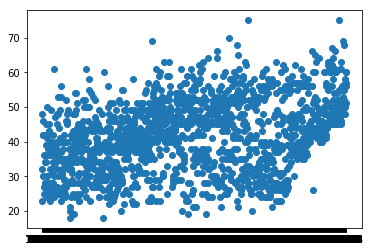

In [10]:
# Look at our data.
plt.scatter(df['40k'],df['age'])
plt.show()



In [11]:
# sns.pairplot(df)

In [12]:
# Make sure the number of rows divides evenly into four samples.
rows = df.shape[0] - df.shape[0] % 4
df = df.iloc[:rows, :]

rows

1612

In [13]:
# Break into a set of features and a variable for the known outcome.
X = df.iloc[:, :14]
y = df.iloc[:, 14]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 14 columns):
age          1612 non-null int64
pace         1612 non-null float64
half         1612 non-null object
official     1612 non-null float64
5k           1612 non-null object
10k          1612 non-null object
20k          1612 non-null object
25k          1612 non-null object
30k          1612 non-null object
35k          1612 non-null object
40k          1612 non-null object
gender       1612 non-null object
division     1612 non-null int64
genderdiv    1612 non-null int64
dtypes: float64(2), int64(3), object(9)
memory usage: 176.4+ KB


In [14]:
df.isnull().sum()

age          0
pace         0
half         0
official     0
5k           0
10k          0
20k          0
25k          0
30k          0
35k          0
40k          0
gender       0
division     0
genderdiv    0
overall      0
dtype: int64

In [15]:
# Replace some random string values.
X = X.replace(to_replace='-', value=0)

In [16]:
# Normalize
X_norm = normalize(X)

In [17]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

In [18]:
# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)


In [19]:
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        

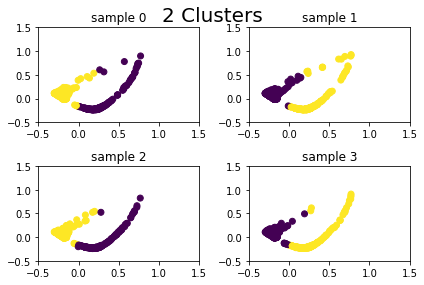

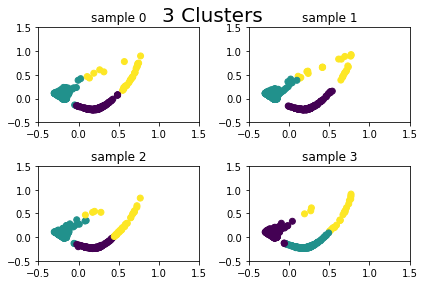

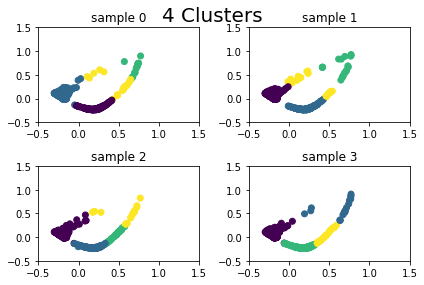

In [20]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-0.5, 1.5])
        axarr[rows, cols].set_ylim([-0.5, 1.5])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [28]:
# Get predicted clusters.
full_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_norm)

pd.crosstab(y, full_pred) 

col_0,0,1,2
overall,,,
1,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
9,0,0,1
10,0,0,1
21,0,0,1
36,0,0,1
40,0,0,1


In [29]:
from sklearn import metrics
    
metrics.adjusted_rand_score(y, full_pred)

0.0

In [41]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=3, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.734645385672035
0.7247468944332977
0.7252850801892196
0.7173469829281981
